In [1]:
import random
from random import randrange
import copy
import matplotlib.pyplot as plt
import imageio

In [3]:
#loading datasets 
import numpy as np
kroa={}
krob={}
np_kroa=[]
np_krob=[]
with open('kroa100.txt') as f:
    lines = f.readlines()
    for line in lines[6:-1]:
        x=list(map(int,line.strip().split(' ')))
        #print(x)
        kroa[x[0]]=(x[1],x[2])
        np_kroa.append((x[1],x[2]))
np_kroa=np.array(np_kroa)
with open('krob100.txt') as f:
    lines = f.readlines()
    for line in lines[6:-1]:
        x=list(map(int,line.strip().split(' ')))
        #print(x)
        krob[x[0]]=(x[1],x[2])
        np_krob.append((x[1],x[2]))

np_kroa=np.array(np_kroa)
np_krob=np.array(np_krob)

# print(np_kroa)
# print(np_krob)

# Rezultat - wspolrzedne punktow z datasetu kroa i krob w dwóch strukturach - np_array i dict (z id jako klucz)

In [4]:
#calculating distance matrix - https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance_matrix.html
from scipy.spatial import distance_matrix
dista=distance_matrix(np_kroa,np_kroa)
distb=distance_matrix(np_krob,np_krob)
print(dista)

[[   0.         1692.82987923 2252.27085405 ...  782.65254104
  1468.2523625  2643.49408927]
 [1692.82987923    0.         1708.46978317 ... 1911.41099714
  3155.99366286 1830.8052873 ]
 [2252.27085405 1708.46978317    0.         ... 1786.23542681
  3314.91553437  454.27854891]
 ...
 [ 782.65254104 1911.41099714 1786.23542681 ...    0.
  1535.21985396 2227.58434184]
 [1468.2523625  3155.99366286 3314.91553437 ... 1535.21985396
     0.         3760.45316418]
 [2643.49408927 1830.8052873   454.27854891 ... 2227.58434184
  3760.45316418    0.        ]]


28762.023844223648 35172.97944676975 32685.85852652911


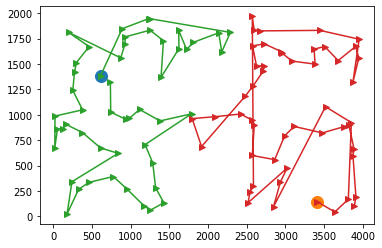

In [13]:
from random import randrange
import copy
#Budowa dwóch cykli metodą najbliższego sąsiada

#THE DATASET - który zbior wybieramy
choice="kroa"

#INITIALIZING RESULTS VARIABLES
results=[]
min_result=np.inf
max_result=0

#LOOP TO GATHER ALL RESULTS
for i in range(0,100):
    
    if choice=="kroa":
        dataset=np_kroa
        dic=kroa
        dist=copy.deepcopy(dista)
        dist_stable=copy.deepcopy(dista)
    else:
        dataset=np_krob
        dic=krob
        dist=copy.deepcopy(distb)
        dist_stable=copy.deepcopy(distb)


    #zmiana dystansu przekątnej na nieskonczonosc
    np.fill_diagonal(dist, np.inf)

    cycles={}
    cycles[0]=[randrange(100)]
    cycles[1]=[(np.argsort(dist[cycles[0][0]])[-2])]

    for b in range(2):
        dist[:,int(cycles[b][0])]=np.inf

    chosenCycle=1
    for i in range(0,98):
        chosenCycle = int((chosenCycle + 1)%2)
        candidates=[]
        for z,index in enumerate(cycles[chosenCycle]):
            candidates.append((np.argmin(dist[index]),np.min(dist[index]),z))
        candidates=np.array(candidates)
        x=np.argmin(candidates[:,1])
        cycles[chosenCycle]=np.insert(cycles[chosenCycle],int(candidates[x,2]),int(candidates[x,0]))
        dist[:,int(candidates[x,0])]=np.inf
    #     if chosenCycle % 2 == 1:
    #         plotPartResult(np_kroa, cycles, i)

    #SAVING RESULTS 
    results.append(calcDistance(cycles[0],dist_stable)+calcDistance(cycles[1],dist_stable))
    if results[-1]>max_result:
        max_result=results[-1]
    if results[-1]<min_result:
        min_result=results[-1]
        plt.clf()
        plt.plot(dataset[:,0][cycles[0][0]], dataset[:,1][cycles[0][0]], "o", markersize=12)
        plt.plot(dataset[:,0][cycles[1][0]], dataset[:,1][cycles[1][0]], "o", markersize=12)
        plt.plot(dataset[:,0][cycles[0]], dataset[:,1][cycles[0]], "->")
        plt.plot(dataset[:,0][cycles[1]], dataset[:,1][cycles[1]], "->")
        plt.savefig(f'best_NN_{choice}.png')

#SAVING RESULTS
average_result=np.mean(np.array(results))
with open(f"NN_results_{choice}.txt","w") as f:
    f.write(f"{average_result} ({min_result} - {max_result})")

#SHOWING RESULTS HERE
print(min_result,max_result,average_result)
plt.show()


In [181]:
def calcPath(currentCycle, newV, dist):
    distance = 0
    toTake = copy.deepcopy(currentCycle)
    toTake.append(newV)
    candidates = [toTake.pop(0)]

    for _ in range(len(toTake)):
        sortedDist = np.sort(dist[candidates[-1]])
        sortedArgDist = np.argsort(dist[candidates[-1]])
        #print(sortedArgDist)
        for j,sArg in enumerate(sortedArgDist):
            #print(f"sArg: {sArg}")
            if sArg in toTake:
                #print(f"Arg {sArg} was taken")
                i = np.argwhere(np.array(toTake) == sArg)[0][0]
                #print(f"i: {i}")
                candidates.append(toTake.pop(i))
                distance += sortedDist[j]
                break
    return distance, candidates

In [ ]:
#THE DATASET - który zbior wybieramy
choice="kroa"

if choice=="kroa":
    dataset=np_kroa
    dic=kroa
    dist=copy.deepcopy(dista)
else:
    dataset=np_krob
    dic=krob
    dist=copy.deepcopy(distb)

#zmiana dystansu przekątnej na nieskonczonosc
np.fill_diagonal(dist, np.inf)

cycles={}
cycles[0]=[]
cycles[1]=[]
#mając macierz odległosci dodawac zawsze najblizszy wobec wszystkich i wstawiac go w cykl po tym dla ktorego odleglosc znaleziono

# select starting vertex
cycles[0].append(randrange(100))
cycles[1].append(np.argsort(dist[cycles[0][0]])[-2])
print(cycles)
chosenCycle = 1
for i in range(98):
    #print(i)
    chosenCycle = (chosenCycle + 1)%2
    minDistance = np.inf
    minVertex = None
    minPath = None
    
    for vertex in range(len(dist)):
        if vertex in [*cycles[0], *cycles[1]]: 
            continue
        distance, path = calcPath(cycles[chosenCycle], vertex, dist)
        if distance < minDistance:
            minDistance = distance
            minVertex = vertex
            minPath = path
    #print(f"chosenCycle: {chosenCycle}; minVertex: {minVertex}, minDistance: {minDistance}")
    cycles[chosenCycle] = minPath
    plotResult(np_kroa, cycles)

In [6]:
def plotResult(np_dots, cycles):
    plt.plot(np_dots[:,0][cycles[0][0]], np_dots[:,1][cycles[0][0]], "o", markersize=12)
    plt.plot(np_dots[:,0][cycles[1][0]], np_dots[:,1][cycles[1][0]], "o", markersize=12)
    plt.plot(np_dots[:,0][cycles[0]], np_dots[:,1][cycles[0]], "->")
    plt.plot(np_dots[:,0][cycles[1]], np_dots[:,1][cycles[1]], "->")
    plt.show()
    
def plotPartResult(np_dots, cycles,i):
    plt.plot(np_dots[:,0][cycles[0][0]], np_dots[:,1][cycles[0][0]], "o", markersize=12)
    plt.plot(np_dots[:,0][cycles[1][0]], np_dots[:,1][cycles[1][0]], "o", markersize=12)
    plt.plot(np_dots[:,0][cycles[0]], np_dots[:,1][cycles[0]], "->")
    plt.plot(np_dots[:,0][cycles[1]], np_dots[:,1][cycles[1]], "->")
    plt.plot(np_dots[:,0], np_dots[:,1], ".")
    plt.savefig(f'plots/{i}.png')
    plt.show()    

In [241]:
x = [0,2,3]
x.insert(1,2)
x

[0, 2, 2, 3]

In [8]:
def calcDistance(currentCycle, dist):
    distance = 0
    for x,y in zip(currentCycle, [*currentCycle[1:], currentCycle[0]]):
        distance += dist[x][y]
    return distance

In [243]:
def findNewCycle(currentCycle, newV, dist):
    distance = 0
    minNewCycle = None
    minDistance = np.inf
    for i in range(len(currentCycle)+1):
        newCycle = copy.deepcopy(currentCycle)
        newCycle.insert(i, newV)
        distance = calcDistance(newCycle, dist)
        
        if distance < minDistance:
            minDistance = distance 
            minNewCycle = newCycle
        
    return minDistance, minNewCycle

{0: [19], 1: [25]}


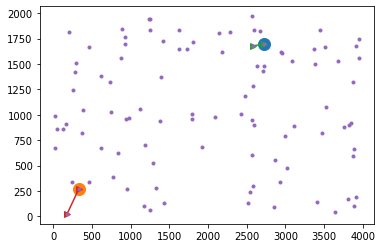

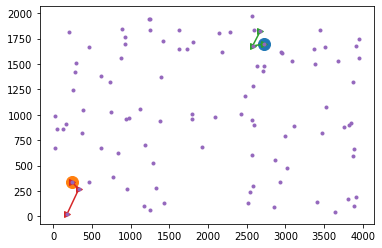

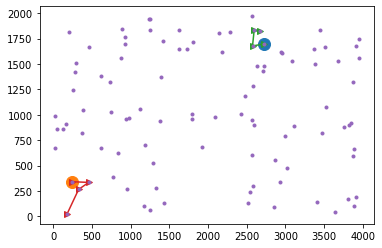

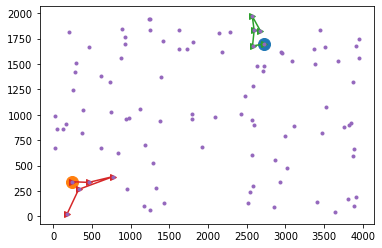

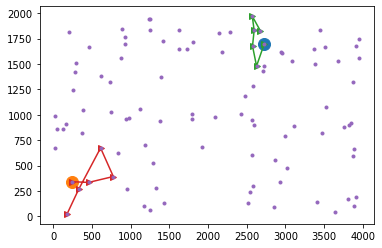

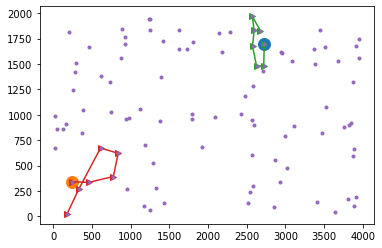

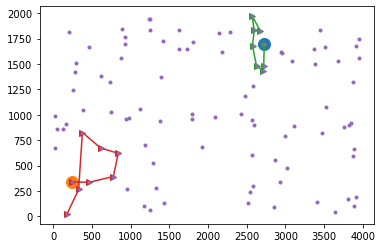

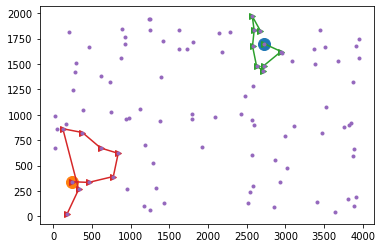

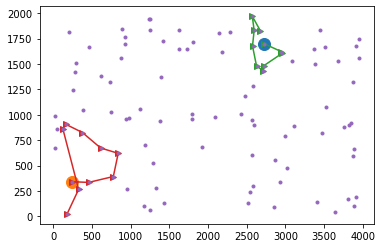

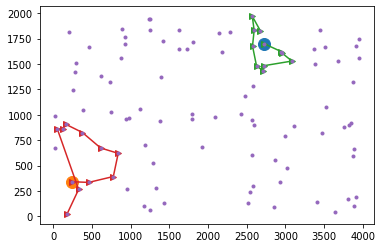

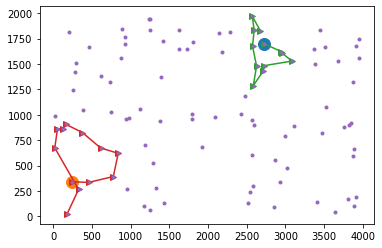

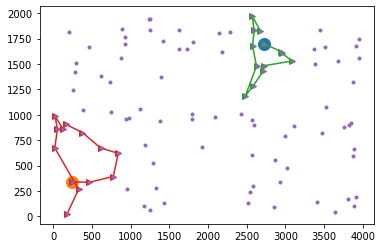

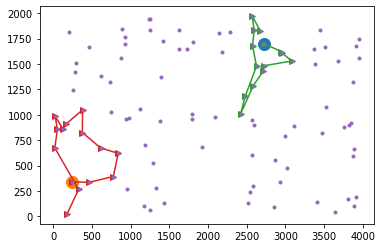

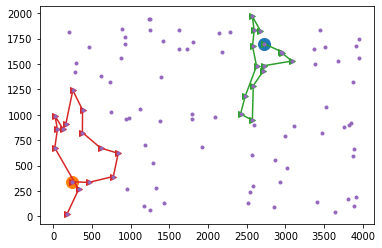

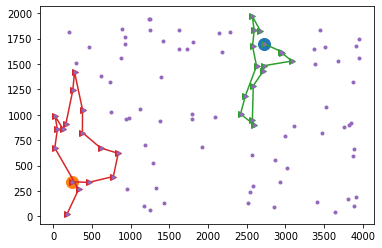

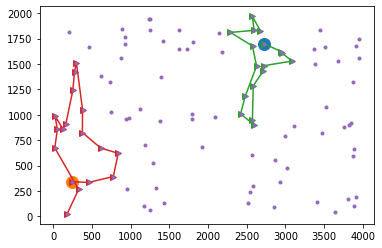

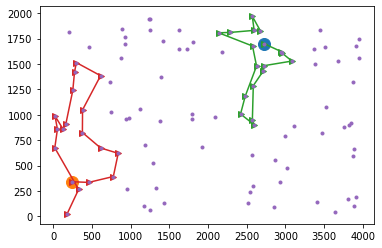

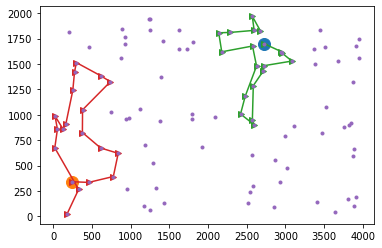

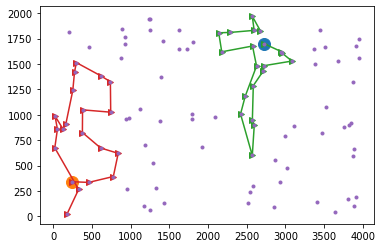

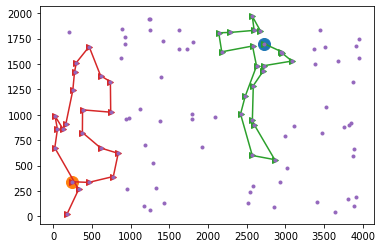

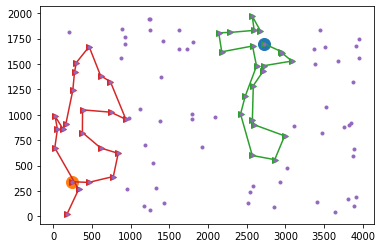

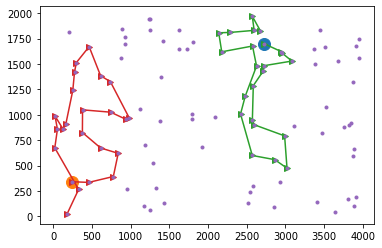

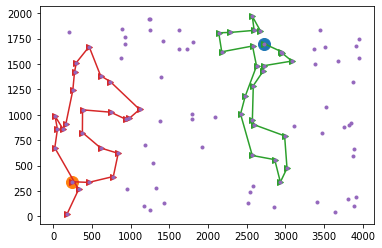

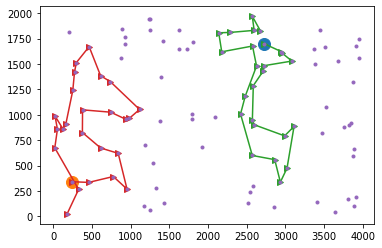

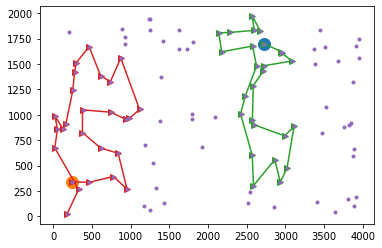

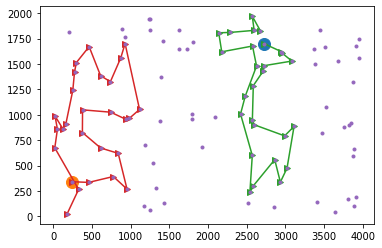

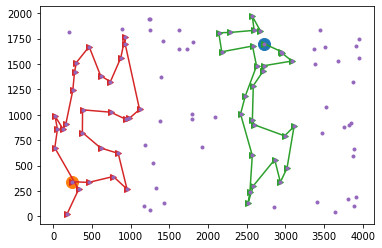

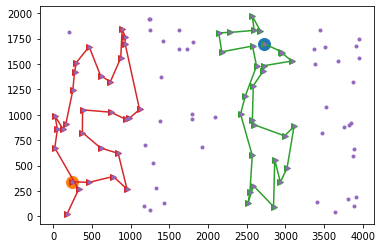

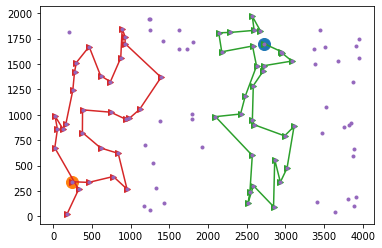

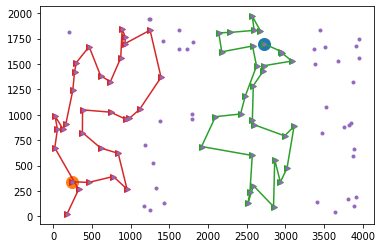

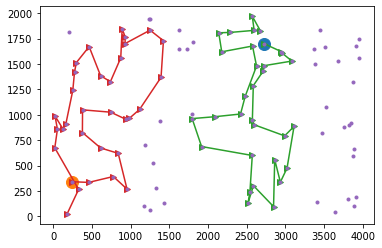

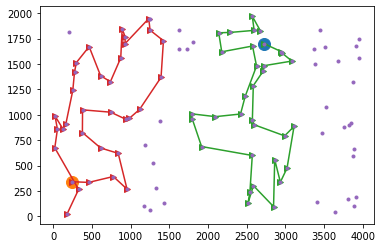

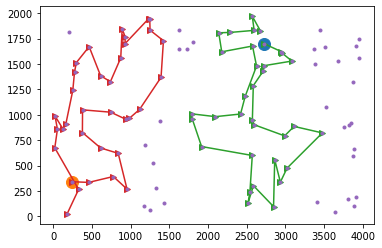

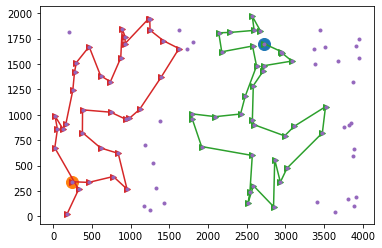

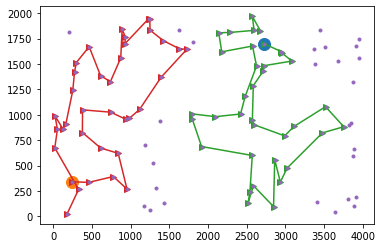

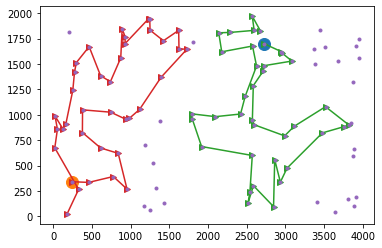

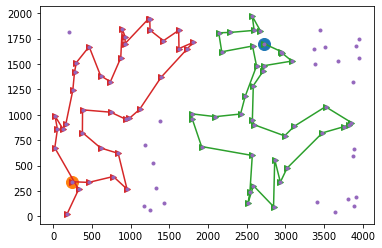

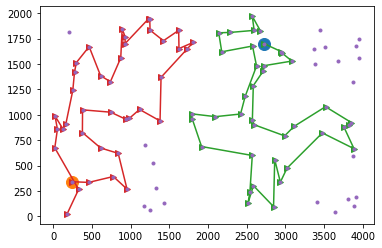

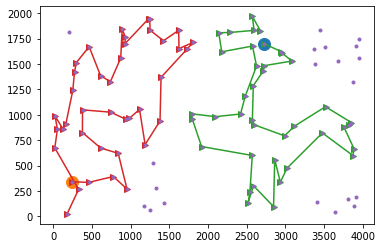

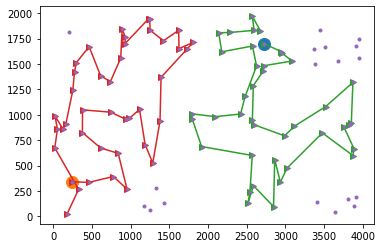

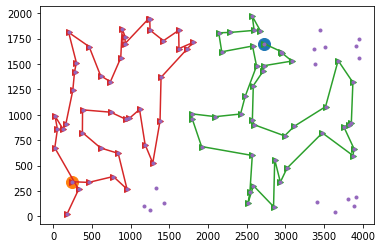

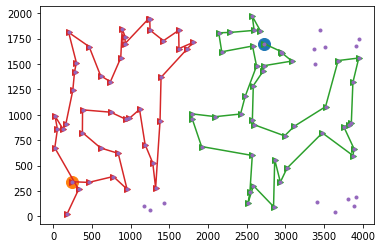

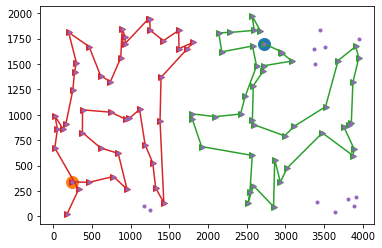

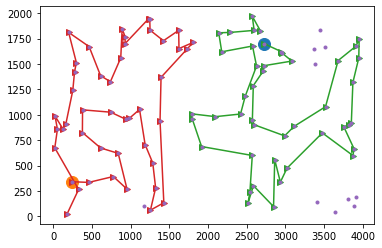

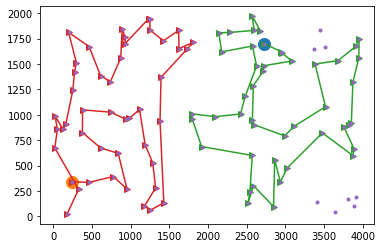

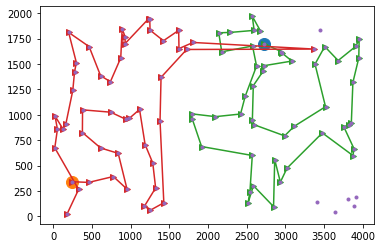

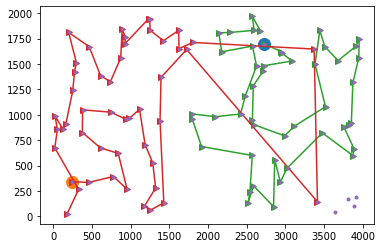

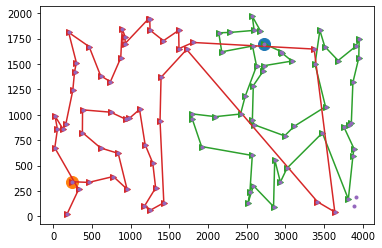

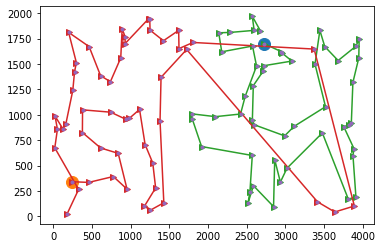

In [249]:
#THE DATASET - który zbior wybieramy
choice="kroa"

if choice=="kroa":
    dataset=np_kroa
    dic=kroa
    dist=copy.deepcopy(dista)
else:
    dataset=np_krob
    dic=krob
    dist=copy.deepcopy(distb)

#zmiana dystansu przekątnej na nieskonczonosc
np.fill_diagonal(dist, np.inf)

cycles={}
cycles[0]=[]
cycles[1]=[]
#mając macierz odległosci dodawac zawsze najblizszy wobec wszystkich i wstawiac go w cykl po tym dla ktorego odleglosc znaleziono

# select starting vertex
cycles[0].append(randrange(100))
cycles[1].append(np.argsort(dist[cycles[0][0]])[-2])
print(cycles)
chosenCycle = 1
for i in range(98):
    #print(i)
    chosenCycle = (chosenCycle + 1)%2
    minDistance = np.inf
    minVertex = None
    minPath = None
    
    for vertex in range(len(dist)):
        if vertex in [*cycles[0], *cycles[1]]: 
            continue
        distance, path = findNewCycle(cycles[chosenCycle], vertex, dist)
        if distance < minDistance:
            minDistance = distance
            minVertex = vertex
            minPath = path
    #print(f"chosenCycle: {chosenCycle}; minVertex: {minVertex}, minDistance: {minDistance}")
    cycles[chosenCycle] = minPath
    
    if chosenCycle % 2 == 1:
        plotPartResult(np_kroa, cycles, i)
        
    
        
        
            
        

In [250]:
filenames = []
for i in range(1,98,2):   
    # create file name and append it to a list
    filename = f'plots/{i}.png'
    filenames.append(filename)

# build gif
with imageio.get_writer('mygif.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

In [161]:
plt.plot(np_dots[:,0][cycles[0][0]], np_dots[:,1][cycles[0][0]], "->")
plt.plot(np_dots[:,0][cycles[1][0]], np_dots[:,1][cycles[1][0]], "->")
plt.show()

NameError: name 'np_dots' is not defined

In [187]:
cycles={}
cycles[0]=[]
cycles[1]=[]
cycles[0].append(randrange(100))
cycles[1].append(np.argsort(dist[cycles[0][0]])[-2])

In [189]:
cycles

{0: [9,
  83,
  71,
  20,
  73,
  58,
  16,
  14,
  10,
  31,
  90,
  97,
  22,
  44,
  46,
  62,
  5,
  48,
  89,
  78,
  52,
  87,
  15,
  21,
  93,
  69,
  65,
  64,
  3,
  96,
  55,
  79,
  30,
  88,
  41,
  7,
  91,
  0,
  92,
  27,
  66,
  57,
  76,
  59,
  61,
  42,
  74,
  17,
  23,
  35],
 1: [75,
  32,
  12,
  94,
  81,
  49,
  43,
  72,
  67,
  84,
  38,
  29,
  95,
  77,
  51,
  4,
  36,
  47,
  99,
  70,
  40,
  13,
  2,
  45,
  28,
  33,
  82,
  54,
  11,
  26,
  85,
  34,
  19,
  56,
  6,
  8,
  86,
  50,
  60,
  24,
  80,
  68,
  63,
  39,
  53,
  1,
  18,
  25,
  37,
  98]}

In [135]:
np.argsort(dist[cycles[0][0]])[-2]

array([32, 75, 94, 81, 36,  4, 95, 77, 38, 51, 49, 43, 29,  1, 84, 72, 67,
       47, 63, 39, 53, 68, 13, 99, 28, 80, 24, 70,  2, 45, 33, 40, 60, 86,
       82,  8, 50, 54, 42,  6, 56, 11, 57, 19, 66, 26, 85, 27, 76, 34, 92,
       61, 59, 88, 41, 22,  0,  7, 97, 30, 79, 90, 91, 46, 44, 62, 31, 55,
        5, 48, 74, 96, 10, 14, 16, 89, 18, 71, 20,  9, 73,  3, 58, 83, 64,
       52, 78, 65, 25, 35, 17, 87, 23, 15, 37, 21, 69, 93, 98, 12])

In [133]:
cycles[0][0]

12

In [101]:
i = 24
print(np.argsort(dist[i]))
print(np.sort(dist[i]))

[80 60 50 86 68 67 57 72  8 56 84  6 63 49 66 43 39 19 82 11 54 33 27 76
 92 53 85 26  1 61 38 29 59 28 34 45 22 97 81 90 95  2  0 42 77 46 13 51
 44  4 36 47  7 31 94 88 91 41 62 12 99 70 32 75 30  5 10 40 79 48 14 16
 55 74 71 20 89 73  9 96 58 18 83 78 52  3 35 17 37 64 23 65 87 15 21 98
 93 25 69 24]
[  51.4781507   164.71186964  254.23021064  340.2116988   347.00144092
  444.5278394   478.28234339  483.80264571  506.32005688  535.728476
  542.44078018  555.79222737  644.15215594  650.75955621  706.2081846
  708.46665412  710.72076092  730.00273972  764.23164028  767.60667011
  771.11412904  774.49661071  779.1642959   780.8617035   789.51757422
  812.86284206  884.29915753  885.13106374  893.07110579  909.47897172
  913.59181257  955.30361666  963.75567443  980.20610078 1023.00048876
 1062.26220868 1083.28851189 1098.59728745 1163.51751169 1182.21233287
 1183.73138845 1183.94298849 1194.02051909 1242.4109626  1248.88470244
 1254.13117336 1254.77089542 1280.20662395 1299.87114746 1

In [99]:
cycles

{0: [60,
  24,
  80,
  68,
  72,
  49,
  43,
  1,
  53,
  39,
  63,
  67,
  84,
  38,
  29,
  95,
  77,
  51,
  4,
  36,
  32,
  75,
  12,
  94,
  81,
  47,
  99,
  70,
  40,
  13,
  2,
  45,
  28,
  33,
  82,
  54,
  42,
  61,
  59,
  76,
  74,
  18,
  52,
  78,
  17,
  23,
  37,
  35,
  98,
  93],
 1: [34,
  85,
  26,
  11,
  19,
  56,
  6,
  8,
  86,
  50,
  57,
  27,
  92,
  66,
  0,
  62,
  5,
  48,
  89,
  9,
  83,
  71,
  20,
  73,
  58,
  16,
  14,
  10,
  31,
  90,
  97,
  22,
  44,
  46,
  91,
  7,
  41,
  88,
  30,
  79,
  55,
  96,
  3,
  64,
  65,
  25,
  69,
  21,
  15,
  87]}

In [95]:
currentCycle = [8]
newV = 2

distance = 0
toTake = copy.deepcopy(currentCycle)
toTake.append(newV)
candidates = [toTake.pop(0)]

for _ in range(len(toTake)):
    sortedDist = np.sort(dist[candidates[-1]])
    sortedArgDist = np.argsort(dist[candidates[-1]])
    print(sortedArgDist)
    for j,sArg in enumerate(sortedArgDist):
        #print(f"sArg: {sArg}")
        if sArg in toTake:
            #print(f"Arg {sArg} was taken")
            i = np.argwhere(np.array(toTake) == sArg)[0][0]
            #print(f"i: {i}")
            candidates.append(toTake.pop(i))
            distance += sortedDist[j]
            break
print(distance)
        
        


#candidates.append((np.argmin(dist[index]),np.min(dist[index])))

[ 6 56 86 11 19 54 82 50 33 26 85 24 60 80 34 61 76 28 84 59 45 67 57  2
 42 68 29 72 22 13 38 49 97 92 27 66 90 43 63 47 44 95 39 70 77 99 51 40
 53 46 31  1  4  0 36 81 10 14 16 62 94 12 91  7 32 75  5 41 20 73 88 48
 71 58  9 30 89 79 74 83 55 96 18 35 78 52 37 23 17  3 98 87 15 64 65 21
 93 69 25  8]
sArg: 6
sArg: 56
sArg: 86
sArg: 11
sArg: 19
sArg: 54
sArg: 82
sArg: 50
sArg: 33
sArg: 26
sArg: 85
sArg: 24
sArg: 60
sArg: 80
sArg: 34
sArg: 61
sArg: 76
sArg: 28
sArg: 84
sArg: 59
sArg: 45
sArg: 67
sArg: 57
sArg: 2
[2]
Arg 2 was taken
i: 0
829.1905691697175


In [92]:
sArg

2

In [93]:
toTake

[]

In [66]:
candidates

[5, 10, 2]

In [61]:
distance

171.0263137648707

In [33]:
np.argsort(dist[10])

array([14, 16, 31, 73, 20, 58, 44, 90, 71, 46, 97, 22,  9, 83, 62, 35, 59,
        0,  5, 48, 76, 89, 92, 37, 27, 61, 98, 23, 91, 17, 78, 57, 74,  7,
       18, 66, 34, 52, 19, 85, 50, 56, 26, 87, 60, 86, 11, 15, 93,  6, 96,
        8, 21, 41, 55, 24, 80, 69,  3, 54, 88, 82, 79, 30, 65, 68, 64, 33,
       67, 63, 39, 72, 84, 25, 53, 45, 28, 42, 49, 43,  2,  1, 29, 38, 13,
       70, 47, 95, 40, 99, 77, 81, 51,  4, 36, 94, 12, 32, 75, 10])